In [4]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [5]:
def Equilibrio(Equi,Efterma,L,mu,T,kb):
    contador=0 #tiene q volver a cero cuando cambio de potencial
    recuMS=0 #tiene q volver a cero cuando cambio de pontencial
    for i in range (Equi):  
        for j in range (L*L): #montecarlo
            L = Efterma.shape[0] 
            M = L*L 
            dire=np.random.randint(0,2)#0 vertical arriba, 1 horizontal izquierda
            
            
            if dire == 0: #vertical arriba
    
                x = np.random.randint(0,L)
                y = np.random.randint(0,L)
                if (Efterma[x,y] and Efterma[x-1,y]) == 1: #intento des
                    p = np.random.uniform(0,1)
                    Pdes = np.exp(-mu/kb*T)              
                    if p < (Pdes):
                        Efterma[x,y] = 0
                        Efterma[x-1,y] = 0
                
 
                elif (Efterma[x,y] and Efterma[x-1,y]) == 0: #intento ads
                    p = np.random.uniform(0,1)
                    Pads = np.exp(mu/kb*T)
                    if p < (Pads):
                        Efterma[x,y] = 1
                        Efterma[x-1,y] = 1
                
                 
                        
  
                
            else: #dire == 1: #horizontal izquierda
                
                x = np.random.randint(0,L)
                y = np.random.randint(0,L)
                if (Efterma[x,y] and Efterma[x,y-1]) == 1: #intento desorber
                    p = np.random.uniform(0,1)
                    Pdes = np.exp(-mu/kb*T)              
                    if p < (Pdes):
                        Efterma[x,y] = 0
                        Efterma[x,y-1] = 0
                
 
                elif (Efterma[x,y] and Efterma[x,y-1]) == 0: #intento ads
                    p = np.random.uniform(0,1)
                    Pads = np.exp(mu/kb*T)
                    if p < (Pads):
                        Efterma[x,y] = 1
                        Efterma[x,y-1] = 1
            
            
                    
        E_equi=Efterma
               
        N = np.count_nonzero(E_equi) #numero de particulas adsorbidas por cada i
        recuM=N/M #cubrimiento en cada vez q hago montecarlo o sea cada i
        
        if recuM != 0: #si es distinto de cero junta el recuM en recuMS y suma un contador
            recuMS =+ recuM
            contador =+ 1
        else: 
            contador = 1 #si no adsorbe nada pongo contador 1 para q no tire error, de todas maneras
                         #recuMS va a ser cero todavía, entonces recuP va a ser cero
    
    
    recuP=recuMS/contador #hago el promedio de todos los recubrimientos por cada montecarlo
    return recuP,E_equi

CPU times: user 34min 45s, sys: 10.9 s, total: 34min 56s
Wall time: 35min 12s


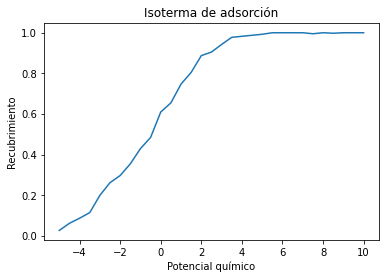

In [3]:
%%time
L = 20 #tamaño de la malla LxL
Equi = 10000
T=1
kb=1
Ei = np.random.randint(0,1,size=[L,L]) #estado incila vacío
Potenciales=[]
Recubrimiento=[]
potenciales=np.linspace(-5, 10, 31)
for mu in potenciales:
    recuP,E_equi=Equilibrio(Equi,Ei,L,mu,T,kb)
    Ei=E_equi
    Potenciales.append(mu)
    Recubrimiento.append(recuP)
    
    

plt.plot(Potenciales,Recubrimiento)
plt.title('Isoterma de adsorción')
plt.ylabel('Recubrimiento')
plt.xlabel('Potencial químico')

In [4]:
L = 20 #tamaño de la malla LxL
mu=0
T=1
kb=1


Recubrimiento1=[]
NdeM1=[] #numero de montecarlos al equilibrio

for Equi1 in range(1,1001,1):
    Ei = np.random.randint(0,1,size=[L,L])
    recuP1,E_equi=Equilibrio(Equi1,Ei,L,mu,T,kb)
    Recubrimiento1.append(recuP1)
    NdeM1.append(Equi1)

  

Text(0.5, 0, 'número de veces de montecarlo')

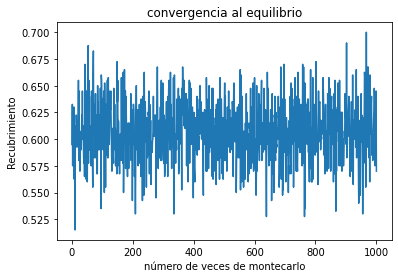

In [5]:
plt.plot(NdeM1,Recubrimiento1)
plt.title('convergencia al equilibrio')
plt.ylabel('Recubrimiento')
plt.xlabel('número de veces de montecarlo') 

In [6]:
%%time
L = 20 #tamaño de la malla LxL
mu=0
T=1
kb=1

NdeM2=[]
Recubrimiento2=[]
for Equi2 in range(9900,10000,1):
    Ei = np.random.randint(0,1,size=[L,L])
    recuP2,E_equi2=Equilibrio(Equi2,Ei,L,mu,T,kb)
    Recubrimiento2.append(recuP2)
    NdeM2.append(Equi2)

CPU times: user 1h 38min 5s, sys: 28.5 s, total: 1h 38min 34s
Wall time: 1h 38min 46s


Text(0.5, 0, 'número de veces de montecarlo')

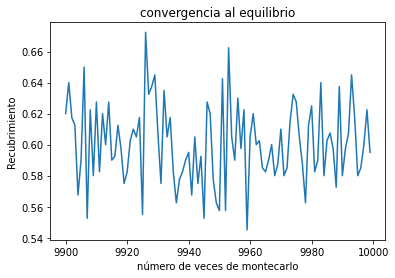

In [8]:
plt.plot(NdeM2,Recubrimiento2)
plt.title('convergencia al equilibrio')
plt.ylabel('Recubrimiento')
plt.xlabel('número de veces de montecarlo') 

In [ ]:
%%time
L = 20 #tamaño de la malla LxL
mu=0
T=1
kb=1

NdeM3=[]
Recubrimiento3=[]
for Equi3 in range(10100,10150,1):
    Ei = np.random.randint(0,1,size=[L,L])
    recuP3,E_equi3=Equilibrio(Equi3,Ei,L,mu,T,kb)
    Recubrimiento2.append(recuP3)
    NdeM2.append(Equi3)